In [2]:
import sys
import os

import spotipy
import json
import pprint
import pandas as pd
import numpy as np
import configparser
import seaborn as sns
import matplotlib.pyplot as plt


import spotipy.oauth2 as oauth2
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
#Authenticate with config file and spotipy client_id, client_secret, username, values

config = configparser.ConfigParser()
config.read('config_ernflerberg.cfg')
client_id = config.get('SPOTIFY', 'CLIENT_ID')
client_secret = config.get('SPOTIFY', 'CLIENT_SECRET')
username = config.get('SPOTIFY', 'USERNAME')


auth = oauth2.SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret
)

token = auth.get_access_token()
spotify = spotipy.Spotify(auth=token)

In [4]:
playlistDictionary={
                   "Liked": "3s3OCt230DDEIGX8xOY58A",  #like: spotify:user:ernflerberg:playlist:3s3OCt230DDEIGX8xOY58A
                   "Dislike": "3tfIr2Q4Qq10fsTzk3lHt6" #dislike: spotify:user:ernflerberg:playlist:3tfIr2Q4Qq10fsTzk3lHt6
                   }
#like: https://open.spotify.com/user/ernflerberg/playlist/3s3OCt230DDEIGX8xOY58A?si=5n5ZRzWwQSCE8ULvfEbLiQ
#dislike: https://open.spotify.com/playlist/4h4W1o7xGfgd60dOeME5aq?si=33-HHYLrTq69we4MYRb7WQ

In [5]:
#Pull 'disLike' Playlist
#spotify:playlist:3tfIr2Q4Qq10fsTzk3lHt6

uri = 'spotify:user:ernflerberg:playlist:3tfIr2Q4Qq10fsTzk3lHt6'
username = username
disliked_playlist_id = '3tfIr2Q4Qq10fsTzk3lHt6'
disliked_results = spotify.user_playlist(username, disliked_playlist_id)

In [6]:
#Pull 'Like' Playlist

uri = 'spotify:user:ernflerberg:playlist:3s3OCt230DDEIGX8xOY58A'
username = username
liked_playlist_id = '3s3OCt230DDEIGX8xOY58A'
liked_results = spotify.user_playlist(username, liked_playlist_id)

In [7]:
#Check that the 'Liked' playlist connects to a song
liked_results['tracks']['items'][0]['track']['id']

'6yl8Es1tCYD9WdSkeVLFw4'

In [8]:
#Check that the 'Disliked' playlist connects to a song
disliked_results['tracks']['items'][0]['track']['id']

'53div1TeIZI0aD9OWbey7k'

In [9]:
#Pull the 'Liked' playlist trac  k information using the Spotipy API JSON 
ldf = []
for i in liked_results['tracks']['items']:
    ldf.append([i['track']['id'],
               i['added_at'], 
         i['track']['album']['artists'][0]['name'],
         i['track']['album']['name'],
         i['track']['duration_ms'],
         i['track']['name'],
         i['track']['popularity']])
ldf = pd.DataFrame(ldf)  
#Add column names for the "Liked" Playlist
ldf.columns = ['song_id','added_at','artist','album','duration_ms','songname','popularity']
#Add column "user_preference" to the Liked Playlist
ldf['user_preference'] = 1
ldf.head()

,song_id,added_at,artist,album,duration_ms,songname,popularity,user_preference
0,6yl8Es1tCYD9WdSkeVLFw4,2019-06-06T05:11:15Z,AC/DC,Who Made Who,210880,You Shook Me All Night Long,72,1
1,3fkPMWQ6cBNBLuFcPyMS8s,2019-06-06T05:11:15Z,Blue Öyster Cult,Fire of Unknown Origin,271000,Burnin' for You,65,1
2,5EWPGh7jbTNO2wakv8LjUI,2019-06-06T05:11:15Z,Lynyrd Skynyrd,Pronounced' Leh-'Nerd 'Skin-'Nerd,547106,Free Bird,70,1
3,6QDbGdbJ57Mtkflsg42WV5,2019-06-06T05:11:15Z,Van Halen,1984 (Remastered),282746,Hot for Teacher - 2015 Remaster,67,1
4,6J17MkMmuzBiIOjRH6MOBZ,2019-06-06T05:11:15Z,AC/DC,Back In Black,266040,Rock and Roll Ain't Noise Pollution,61,1


In [10]:
#Pull the 'Disiked' playlist track information using the Spotipy API JSON
ddf = []
for i in disliked_results['tracks']['items']:
    ddf.append([i['track']['id'],
               i['added_at'], 
         i['track']['album']['artists'][0]['name'],
         i['track']['album']['name'],
         i['track']['duration_ms'],
         i['track']['name'],
         i['track']['popularity']])
ddf = pd.DataFrame(ddf)  
#Add column names for the "Disliked" Playlist
ddf.columns = ['song_id','added_at','artist','album','duration_ms','songname','popularity']
#Add column "user_preference" to the Disliked Playlist
ddf['user_preference'] = 0
ddf.head()

,song_id,added_at,artist,album,duration_ms,songname,popularity,user_preference
0,53div1TeIZI0aD9OWbey7k,2019-06-27T06:13:35Z,Karl Weigl,"Weigl: Symphony No. 1 in E Major, Op. 5 & Pict...",214457,"Pictures and Tales Suite: IV. Sleep, Baby, Sleep",22,0
1,7uB0F29wF9x6kaywZhBSfc,2019-06-27T06:13:35Z,Vincent d'Indy,d'Indy: Orchestral Works,157693,"Karadec Suite, Op. 34: II. Chanson",17,0
2,2C0Pld2135Xve3lEhzypCP,2019-06-27T06:13:35Z,Gürzenich Orchester Köln,"Mussorgsky, Rimsky-Korsakov & Lyadov: Works",440186,"The Enchanted Lake, Op. 62",17,0
3,18ascogkXkFrIdJhEevnRo,2019-06-27T06:13:35Z,The Optina Pustyn Male Choir of St. Petersburg,Orthodox Chants from Russia,149866,Now Lettest Thou Depart,14,0
4,5vGj3qweOgHI47mSK0aRtC,2019-06-27T06:13:35Z,The Optina Pustyn Male Choir of St. Petersburg,Orthodox Chants from Russia,90813,"Hail, O Virgin",13,0


In [11]:
sp = spotipy.Spotify(auth=token)

In [12]:
#Pull Audio Features from Spotipy on song_id for Liked playlist
laf = []
for i in ldf.song_id:
    x = sp.audio_features(i)
    laf.append([i,
               x[0]['danceability'],
                x[0]['energy'],
                    x[0]['key'],
                    x[0]['loudness'],
                    x[0]['mode'],
                    x[0]['speechiness'],
                    x[0]['acousticness'],
                    x[0]['instrumentalness'],
                    x[0]['liveness'],
                    x[0]['valence'],
                    x[0]['tempo'],
                    x[0]['time_signature']])
laf = pd.DataFrame(laf)

laf.columns = ['song_id',
             'danceability',
             'energy',
              'key',
              'loudness',
              'mode',
              'speechiness',
              'acousticness',
              'instrumentalness',
              'liveness',
              'valence',
              'tempo',
              'time_signature'
             ]

#Merge the Liked Audio Features and track information together
lpaf = pd.merge(ldf, laf, on='song_id')
lpaf.head()

,song_id,added_at,artist,album,duration_ms,songname,popularity,user_preference,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6yl8Es1tCYD9WdSkeVLFw4,2019-06-06T05:11:15Z,AC/DC,Who Made Who,210880,You Shook Me All Night Long,72,1,0.529,0.768,7,-5.510,1,0.0566,0.002240,0.000685,0.2970,0.769,127.316,4
1,3fkPMWQ6cBNBLuFcPyMS8s,2019-06-06T05:11:15Z,Blue Öyster Cult,Fire of Unknown Origin,271000,Burnin' for You,65,1,0.532,0.728,9,-9.079,0,0.0352,0.106000,0.010800,0.0849,0.690,134.303,4
2,5EWPGh7jbTNO2wakv8LjUI,2019-06-06T05:11:15Z,Lynyrd Skynyrd,Pronounced' Leh-'Nerd 'Skin-'Nerd,547106,Free Bird,70,1,0.252,0.844,0,-8.121,1,0.0572,0.076500,0.000180,0.0840,0.351,118.158,4
3,6QDbGdbJ57Mtkflsg42WV5,2019-06-06T05:11:15Z,Van Halen,1984 (Remastered),282746,Hot for Teacher - 2015 Remaster,67,1,0.551,0.947,2,-4.671,1,0.1520,0.000652,0.000257,0.0637,0.466,127.657,4
4,6J17MkMmuzBiIOjRH6MOBZ,2019-06-06T05:11:15Z,AC/DC,Back In Black,266040,Rock and Roll Ain't Noise Pollution,61,1,0.576,0.659,9,-5.617,1,0.0383,0.041000,0.000000,0.0587,0.717,94.853,4


In [13]:
#Pull Audio Features from Spotipy on song_id for Disliked playlist
daf = []
for i in ddf.song_id:
    x = sp.audio_features(i)
    daf.append([i,
               x[0]['danceability'],
                x[0]['energy'],
                    x[0]['key'],
                    x[0]['loudness'],
                    x[0]['mode'],
                    x[0]['speechiness'],
                    x[0]['acousticness'],
                    x[0]['instrumentalness'],
                    x[0]['liveness'],
                    x[0]['valence'],
                    x[0]['tempo'],
                    x[0]['time_signature']])
daf = pd.DataFrame(daf)

daf.columns = ['song_id',
             'danceability',
             'energy',
              'key',
              'loudness',
              'mode',
              'speechiness',
              'acousticness',
              'instrumentalness',
              'liveness',
              'valence',
              'tempo',
              'time_signature'
             ]

#Merge the Disliked Audio Features and track information together
dpaf = pd.merge(ddf, daf, on='song_id')
dpaf.head()

,song_id,added_at,artist,album,duration_ms,songname,popularity,user_preference,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,53div1TeIZI0aD9OWbey7k,2019-06-27T06:13:35Z,Karl Weigl,"Weigl: Symphony No. 1 in E Major, Op. 5 & Pict...",214457,"Pictures and Tales Suite: IV. Sleep, Baby, Sleep",22,0,0.167,0.0288,11,-31.893,1,0.0431,0.892,0.9100,0.0979,0.0379,112.084,4
1,7uB0F29wF9x6kaywZhBSfc,2019-06-27T06:13:35Z,Vincent d'Indy,d'Indy: Orchestral Works,157693,"Karadec Suite, Op. 34: II. Chanson",17,0,0.220,0.0185,3,-29.232,1,0.0413,0.984,0.8830,0.3900,0.0396,69.906,3
2,2C0Pld2135Xve3lEhzypCP,2019-06-27T06:13:35Z,Gürzenich Orchester Köln,"Mussorgsky, Rimsky-Korsakov & Lyadov: Works",440186,"The Enchanted Lake, Op. 62",17,0,0.151,0.0286,1,-29.660,1,0.0393,0.941,0.9560,0.0833,0.0301,136.834,3
3,18ascogkXkFrIdJhEevnRo,2019-06-27T06:13:35Z,The Optina Pustyn Male Choir of St. Petersburg,Orthodox Chants from Russia,149866,Now Lettest Thou Depart,14,0,0.241,0.2380,6,-17.250,0,0.0378,0.990,0.0014,0.1080,0.0390,66.805,4
4,5vGj3qweOgHI47mSK0aRtC,2019-06-27T06:13:35Z,The Optina Pustyn Male Choir of St. Petersburg,Orthodox Chants from Russia,90813,"Hail, O Virgin",13,0,0.201,0.1660,1,-21.301,1,0.0358,0.994,0.9550,0.1050,0.0654,78.300,3


In [14]:
#Join Disliked Playlist to Liked Playlist in New Data Frame
df_combined = pd.concat([lpaf, dpaf])
df_combined.head()

,song_id,added_at,artist,album,duration_ms,songname,popularity,user_preference,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6yl8Es1tCYD9WdSkeVLFw4,2019-06-06T05:11:15Z,AC/DC,Who Made Who,210880,You Shook Me All Night Long,72,1,0.529,0.768,7,-5.510,1,0.0566,0.002240,0.000685,0.2970,0.769,127.316,4
1,3fkPMWQ6cBNBLuFcPyMS8s,2019-06-06T05:11:15Z,Blue Öyster Cult,Fire of Unknown Origin,271000,Burnin' for You,65,1,0.532,0.728,9,-9.079,0,0.0352,0.106000,0.010800,0.0849,0.690,134.303,4
2,5EWPGh7jbTNO2wakv8LjUI,2019-06-06T05:11:15Z,Lynyrd Skynyrd,Pronounced' Leh-'Nerd 'Skin-'Nerd,547106,Free Bird,70,1,0.252,0.844,0,-8.121,1,0.0572,0.076500,0.000180,0.0840,0.351,118.158,4
3,6QDbGdbJ57Mtkflsg42WV5,2019-06-06T05:11:15Z,Van Halen,1984 (Remastered),282746,Hot for Teacher - 2015 Remaster,67,1,0.551,0.947,2,-4.671,1,0.1520,0.000652,0.000257,0.0637,0.466,127.657,4
4,6J17MkMmuzBiIOjRH6MOBZ,2019-06-06T05:11:15Z,AC/DC,Back In Black,266040,Rock and Roll Ain't Noise Pollution,61,1,0.576,0.659,9,-5.617,1,0.0383,0.041000,0.000000,0.0587,0.717,94.853,4


## Set up Training Data

In [15]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [16]:
#Set up Training Data
trainingData = df_combined[['popularity', 'danceability','energy','loudness', 'user_preference']]
trainingData.columns = ['popularity', 'danceability','energy','loudness', 'user_preference']
X = trainingData[['popularity', 'danceability','energy','loudness']]
y = trainingData['user_preference']
print(trainingData.shape)


train, test = train_test_split(trainingData, test_size = 0.30)
print("Training size: {}, Test size: {}".format(len(train),len(test)))

(200, 5)
Training size: 140, Test size: 60


## Logistic Regression

In [17]:
#Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

(140, 4) (60, 4) (140,) (60,)
[[29  0]
 [ 1 30]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.97      0.98        31

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

0.9833333333333333


c:\users\aaron\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
#Logistic Regression

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


c:\users\aaron\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0051478245903538, tolerance: 0.0023989583333333332
  positive)
c:\users\aaron\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7105054711256833, tolerance: 0.002395833333333333
  positive)
c:\users\aaron\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9262384757566565, tolerance: 0.0023989583333333332
  positive)
c:\users\aaron\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.9114895433803077
Tuned ElasticNet MSE: 0.022127614154923047


c:\users\aaron\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1088131591496055, tolerance: 0.003
  positive)


## Random Forests

In [19]:
#Random Forests

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


## Decision Tree

In [20]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9833333333333333


## Support Vector Machines

In [21]:
#Support Vector Machines

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


## KNN k=5

In [22]:
#KNN k=5

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9833333333333333


In [23]:
for k in range(0,50):

    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=5)

    #Train the model using the training sets
    knn.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(X_test)

    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics
    # Model Accuracy, how often is the classifier correct?
    print(k,"Accuracy:",metrics.accuracy_score(y_test, y_pred))

0 Accuracy: 0.9833333333333333
1 Accuracy: 0.9833333333333333
2 Accuracy: 0.9833333333333333
3 Accuracy: 0.9833333333333333
4 Accuracy: 0.9833333333333333
5 Accuracy: 0.9833333333333333
6 Accuracy: 0.9833333333333333
7 Accuracy: 0.9833333333333333
8 Accuracy: 0.9833333333333333
9 Accuracy: 0.9833333333333333
10 Accuracy: 0.9833333333333333
11 Accuracy: 0.9833333333333333
12 Accuracy: 0.9833333333333333
13 Accuracy: 0.9833333333333333
14 Accuracy: 0.9833333333333333
15 Accuracy: 0.9833333333333333
16 Accuracy: 0.9833333333333333
17 Accuracy: 0.9833333333333333
18 Accuracy: 0.9833333333333333
19 Accuracy: 0.9833333333333333
20 Accuracy: 0.9833333333333333
21 Accuracy: 0.9833333333333333
22 Accuracy: 0.9833333333333333
23 Accuracy: 0.9833333333333333
24 Accuracy: 0.9833333333333333
25 Accuracy: 0.9833333333333333
26 Accuracy: 0.9833333333333333
27 Accuracy: 0.9833333333333333
28 Accuracy: 0.9833333333333333
29 Accuracy: 0.9833333333333333
30 Accuracy: 0.9833333333333333
31 Accuracy: 0.983

## KNN k=7

In [24]:
#KNN k=7

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9833333333333333


## ROC_AUC_score

In [25]:
#ROC_AUC_score

# Import the function to calculate ROC/AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

# Calculate ROC/AUC score by comparing target_test with the prediction
roc_auc_score(y_test, y_pred)

0.9827586206896552

## roc_auc_curve

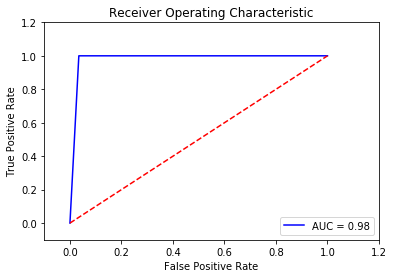

In [26]:
#roc_auc_curve

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Prediction Playlist

In [52]:
#Pull 'Prediction' Playlist

uri = 'spotify:user:ernflerberg:playlist:0rGzqU8NvMmzubBWGeDUEv'
username = username
predict_playlist_id = '0rGzqU8NvMmzubBWGeDUEv'
predict_results = spotify.user_playlist(username, predict_playlist_id)

In [53]:
#Pull the 'Liked' playlist trac  k information using the Spotipy API JSON 
predictplaylist = []
for i in predict_results['tracks']['items']:
    predictplaylist.append([i['track']['id'],
               i['added_at'], 
         i['track']['album']['artists'][0]['name'],
         i['track']['album']['name'],
         i['track']['duration_ms'],
         i['track']['name'],
         i['track']['popularity']])
predictplaylist = pd.DataFrame(predictplaylist)  
#Add column names for the "Prediction" Playlist
predictplaylist.columns = ['song_id','added_at','artist','album','duration_ms','songname','popularity']
predictplaylist.head()

,song_id,added_at,artist,album,duration_ms,songname,popularity
0,12rhvKDK2FfHTZZ1sSAHDG,2019-07-11T06:44:40Z,Matt Maeson,Bank On The Funeral,216213,Cringe,57
1,5CD5JRgUg3z5yXbT6YFslh,2019-07-11T06:44:40Z,Joe Russo's Almost Dead,"Albany, NY :: 2018-03-16",677253,Feel Like A Stranger > - Live 2018-03-16,34
2,5cKSzaikxKsabI5KscouIL,2019-07-11T06:44:40Z,LUTHI,Stranger,209193,Milk and Honey,36
3,21KPfBXJIbmuoDwGZk24IT,2019-07-11T06:44:40Z,Mikey Mike,Cooler,205080,Cooler,34
4,6gQoYfsjVx5NyT8zdrnZOm,2019-07-11T06:44:40Z,Mickey Avalon,I'm Better Than You,245517,All Around the World,26


In [54]:
#Pull Audio Features from Spotipy on song_id for Prediction playlist
predictfeat = []
for i in predictplaylist.song_id:
    x = sp.audio_features(i)
    predictfeat.append([i,
               x[0]['danceability'],
                x[0]['energy'],
                    x[0]['key'],
                    x[0]['loudness'],
                    x[0]['mode'],
                    x[0]['speechiness'],
                    x[0]['acousticness'],
                    x[0]['instrumentalness'],
                    x[0]['liveness'],
                    x[0]['valence'],
                    x[0]['tempo'],
                    x[0]['time_signature']])
predictfeat = pd.DataFrame(predictfeat)

predictfeat.columns = ['song_id',
             'danceability',
             'energy',
              'key',
              'loudness',
              'mode',
              'speechiness',
              'acousticness',
              'instrumentalness',
              'liveness',
              'valence',
              'tempo',
              'time_signature'
             ]
predictfeat.head()

,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,12rhvKDK2FfHTZZ1sSAHDG,0.729,0.474,5,-7.724,1,0.0553,0.0652,0.00000,0.0758,0.443,126.047,4
1,5CD5JRgUg3z5yXbT6YFslh,0.490,0.719,2,-13.671,1,0.0382,0.3570,0.83500,0.8580,0.595,98.652,4
2,5cKSzaikxKsabI5KscouIL,0.694,0.717,4,-5.758,0,0.0266,0.0280,0.00762,0.1250,0.837,107.014,4
3,21KPfBXJIbmuoDwGZk24IT,0.821,0.894,11,-4.464,1,0.0532,0.1750,0.00000,0.1410,0.879,121.033,4
4,6gQoYfsjVx5NyT8zdrnZOm,0.768,0.734,1,-7.871,1,0.3700,0.4090,0.00000,0.1040,0.677,86.885,4


In [55]:
#Merge the Predict Audio Features and track information together
predictfeatures = pd.merge(predictplaylist, predictfeat, on='song_id')
predictfeatures

,song_id,added_at,artist,album,duration_ms,songname,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,12rhvKDK2FfHTZZ1sSAHDG,2019-07-11T06:44:40Z,Matt Maeson,Bank On The Funeral,216213,Cringe,57,0.729,0.4740,5,-7.724,1,0.0553,0.065200,0.000000,0.0758,0.4430,126.047,4
1,5CD5JRgUg3z5yXbT6YFslh,2019-07-11T06:44:40Z,Joe Russo's Almost Dead,"Albany, NY :: 2018-03-16",677253,Feel Like A Stranger > - Live 2018-03-16,34,0.490,0.7190,2,-13.671,1,0.0382,0.357000,0.835000,0.8580,0.5950,98.652,4
2,5cKSzaikxKsabI5KscouIL,2019-07-11T06:44:40Z,LUTHI,Stranger,209193,Milk and Honey,36,0.694,0.7170,4,-5.758,0,0.0266,0.028000,0.007620,0.1250,0.8370,107.014,4
3,21KPfBXJIbmuoDwGZk24IT,2019-07-11T06:44:40Z,Mikey Mike,Cooler,205080,Cooler,34,0.821,0.8940,11,-4.464,1,0.0532,0.175000,0.000000,0.1410,0.8790,121.033,4
4,6gQoYfsjVx5NyT8zdrnZOm,2019-07-11T06:44:40Z,Mickey Avalon,I'm Better Than You,245517,All Around the World,26,0.768,0.7340,1,-7.871,1,0.3700,0.409000,0.000000,0.1040,0.6770,86.885,4
5,0HsBvYy3nIkkSpxM32yekx,2019-07-11T06:44:40Z,J.Lately,Clean (ft. The Grouch),224046,Clean (feat. The Grouch),30,0.657,0.6400,6,-6.135,1,0.3620,0.143000,0.000002,0.1000,0.3430,150.134,4
6,3iB5QaKg8PEFkNKG2diLyB,2019-07-11T06:44:40Z,TreeHouse!,Prayer for the Day,331008,Prayer for the Day,29,0.651,0.6090,7,-8.799,1,0.0554,0.014800,0.000000,0.4970,0.4220,156.949,4
7,649o53ULWYN1y7V2OI5kgo,2019-07-11T06:44:40Z,Young the Giant,Mirror Master,211386,Heat of the Summer,62,0.602,0.8560,7,-5.558,1,0.0458,0.005150,0.000003,0.0980,0.8950,80.021,4
8,1YvIN7chb19u8Cs4zQtDd1,2019-07-11T06:44:40Z,Cold War Kids,Complainer / 4th of July,260413,4th of July,45,0.739,0.4310,0,-6.137,0,0.0327,0.075100,0.000015,0.0985,0.6540,79.040,4
9,5wqMcnVSNR6YInHzJl42I0,2019-07-11T06:44:40Z,SonReal,The Aaron LP,207883,Fearless,45,0.672,0.3030,1,-9.252,0,0.0299,0.823000,0.000000,0.1060,0.3660,108.011,4


In [60]:
trainingdatapredict = predictfeatures[['popularity', 'danceability','energy','loudness']]

In [61]:
logreg.predict(trainingdatapredict)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [62]:
likedSongs = 0
i = 0
for prediction in pred:
    if(prediction == 1):
        print ("Song: " + predictfeatures["songname"][i] + ", By: "+ predictfeatures["artist"][i])
        #sp.user_playlist_add_tracks("1287242681", "7eIX1zvtpZR3M3rYFVA7DF", [test['id'][i]])
        likedSongs= likedSongs + 1
    i = i +1

Song: Cringe, By: Matt Maeson
Song: Milk and Honey, By: LUTHI
Song: Cooler, By: Mikey Mike
Song: All Around the World, By: Mickey Avalon
Song: Clean (feat. The Grouch), By: J.Lately
Song: Prayer for the Day, By: TreeHouse!
Song: Heat of the Summer, By: Young the Giant
Song: 4th of July, By: Cold War Kids
Song: Fearless, By: SonReal
Song: Hi Power, By: The Late Ones
Song: Way Down, By: The Dangerous Summer
Song: How Sweet It Is (To Be Loved By You) - Live at French's Camp, Piercy, CA, 8/29/1987, By: Jerry Garcia Band
Song: What Now, By: Waker
Song: Pass It Around, By: LAV.ISH
Song: Painters Painting Paintings, By: Medusa's Disco
Song: Passengers, By: Evan Castle & the Southern Tier
Song: Are You Dumm?, By: Flmmboiint Frdii
Song: I Know Not, By: Jimmy Donn
Song: Never Again, By: John Hart
Song: I Want to Know (feat. Dan Kelly & Essel), By: Seedless
Song: Dangerous Indeed, By: Rare Creatures
Song: Love for Love City (with Ziggy Marley), By: Kenny Chesney
Song: Feeling, By: Back to Yours
S

In [ ]:
df_liked = df_combined[df_combined['user_preference']==1]
df_disliked = df_combined[df_combined['user_preference']==0]

sns.set(style='darkgrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(df_liked['acousticness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}).set(xlabel='acousticness', ylabel='Count')
sns.distplot(df_disliked['acousticness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}).set(xlabel='acousticness', ylabel='Count')
plt.legend(title='User Preference', labels=['Liked', 'Disliked'])

In [ ]:
LikedId=playlistDictionary["Liked"]
DislikeId=playlistDictionary["Dislike"]
spotifyUsername='ernflerberg'

likedplay=sp.user_playlist(spotifyUsername, playlist_id=LikedId)
dislikeplay=sp.user_playlist(spotifyUsername, playlist_id=DislikeId)

df_liked = df_combined[df_combined['user_preference']==1]
df_disliked = df_combined[df_combined['user_preference']==0]

column=('songname', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'valence', 'instrumentalness','tempo')
playlistList=[likedplay, dislikeplay]
n_bins=20
fig, axs = plt.subplots(figsize=(24, 8), nrows=2, ncols=4)
axs=axs.flatten()

    
sns.distplot(df_liked['danceability'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[0]).set(xlabel='danceability', ylabel='Count')
sns.distplot(df_disliked['danceability'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[0]).set(xlabel='danceability', ylabel='Count')
    
sns.distplot(df_liked['energy'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[1]).set(xlabel='energy', ylabel='Count')
sns.distplot(df_disliked['energy'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[1]).set(xlabel='energy', ylabel='Count')
    
sns.distplot(df_liked['loudness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[2]).set(xlabel='loudness', ylabel='Count')
sns.distplot(df_disliked['loudness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[2]).set(xlabel='loudness', ylabel='Count')
    
sns.distplot(df_liked['speechiness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[3]).set(xlabel='speechiness', ylabel='Count')
sns.distplot(df_disliked['speechiness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[3]).set(xlabel='speechiness', ylabel='Count')
    
sns.distplot(df_liked['acousticness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[4]).set(xlabel='acousticness', ylabel='Count')
sns.distplot(df_disliked['acousticness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[4]).set(xlabel='acousticness', ylabel='Count')
    
sns.distplot(df_liked['valence'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[5]).set(xlabel='valence', ylabel='Count')
sns.distplot(df_disliked['valence'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[5]).set(xlabel='valence', ylabel='Count')
    
sns.distplot(df_liked['instrumentalness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[6]).set(xlabel='instrumentalness', ylabel='Count')
sns.distplot(df_disliked['instrumentalness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[6]).set(xlabel='instrumentalness', ylabel='Count')
    
sns.distplot(df_liked['tempo'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[7]).set(xlabel='tempo', ylabel='Count')
sns.distplot(df_disliked['tempo'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[7]).set(xlabel='tempo', ylabel='Count')


In [ ]:
# plot a boxplot of acousticness for an overview
sns.boxplot(x='user_preference', y='acousticness', data=df_combined)

_ = plt.xlabel('User Preference')
_ = plt.ylabel('Acousticness')
_ = plt.title('Song Acousticness based on User Preference')

plt.show()

#add hypothesis test

In [ ]:
# plot a boxplot of tempo for an overview
sns.boxplot(x='user_preference', y='tempo', data=df_combined)

_ = plt.xlabel('User Preference')
_ = plt.ylabel('Tempo')
_ = plt.title('Song Tempo based on User Preference')

plt.show()

In [ ]:
# plot a boxplot of tempo for an overview
sns.boxplot(x='user_preference', y='loudness', data=df_combined)

_ = plt.xlabel('User Preference')
_ = plt.ylabel('Loudness')
_ = plt.title('Song Volume based on User Preference')

plt.show()

In [ ]:
df_combined.head()

In [ ]:
# Create a scatter plot
sns.lmplot(x='energy', y='loudness', data=df_combined,
           fit_reg=False, # No regression line
           hue='user_preference') 



In [ ]:
# Pre-format DataFrame
stats_df = df_combined.drop(['song_id', 'added_at', 'artist', 'album', 'duration_ms', 'songname', 'popularity', 'tempo', 'key', 'mode','time_signature'], axis=1)

In [ ]:
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*100
    dataNorm["user_preference"]=dataset["user_preference"]
    return dataNorm

In [ ]:
normdata=normalize(stats_df)
normdata.sample(5)

In [ ]:
# Scatter plot
sns.lmplot(x='energy', y='loudness', data=normdata,
           fit_reg=False, # No regression line
           hue='user_preference') 

In [ ]:
sns.swarmplot(x='user_preference', y='energy', data=normdata)